In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [13]:
X,y=make_classification(n_samples=1500, n_classes=3, n_features=4, n_informative=3, n_redundant=1,n_clusters_per_class=2, random_state=42)

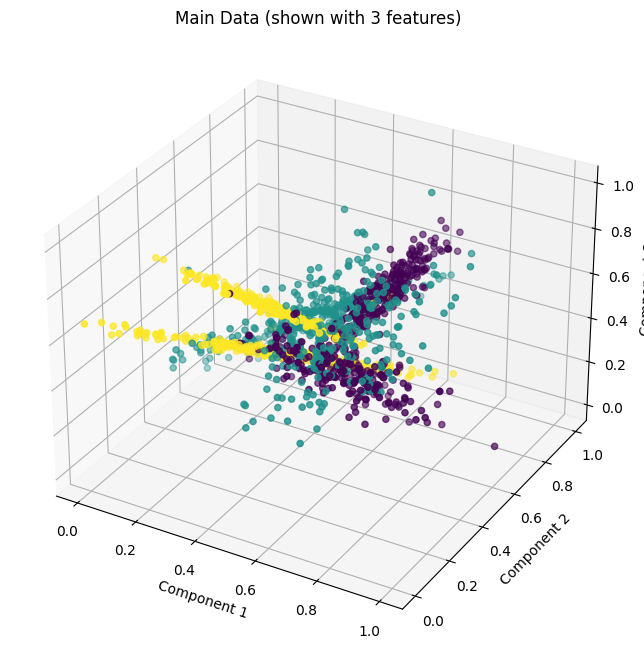

In [14]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Plot the t-SNE embedding
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap='viridis')
ax.set_title('Main Data (shown with 3 features)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

# Part A

## TSNE

In [15]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE to reduce the dimensions to 3 components
tsne = TSNE(n_components=3, early_exaggeration=20)
X_tsne = tsne.fit_transform(X_scaled)

# Calculate the explained variance
explained_variance = np.sum(tsne.kl_divergence_)

print("Explained Variance:", explained_variance)

Explained Variance: 0.4703872799873352


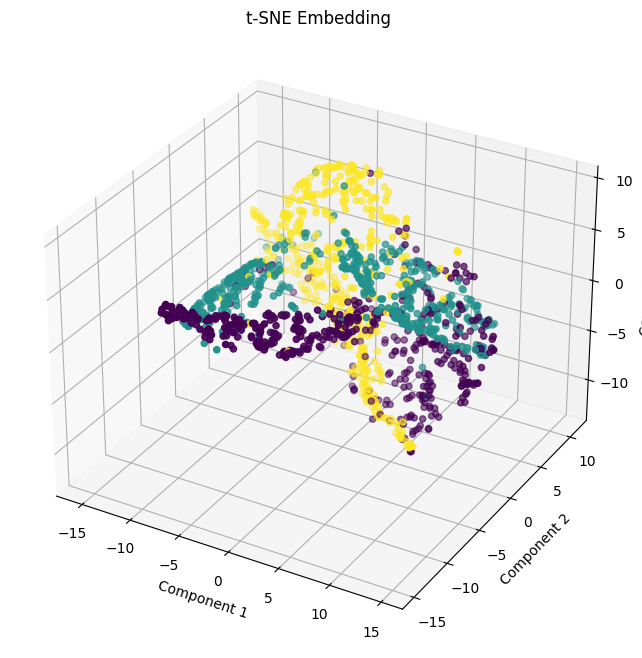

In [16]:
# Plot the t-SNE embedding
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('t-SNE Embedding')
plt.show()

## AE

In [24]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the dimensions of the autoencoder
input_dim = X_train.shape[1]

encoding_dim = 3


# Define the autoencoder model
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='elu')(input_layer)
encoder = BatchNormalization()(encoder)
encoder = Dense(16, activation='elu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(8, activation='relu')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(8, activation='relu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(16, activation='elu')(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(64, activation='elu')(decoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

import keras
opt = keras.optimizers.Adam(learning_rate=0.0006)
# Compile the model
autoencoder.compile(optimizer=opt, loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=200, batch_size=16, validation_data=(X_test, X_test))

# Get the encoded representation of the data
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(X_scaled)


Epoch 1/200
66/66 [==============================] - 1s 5ms/step - loss: 0.0284 - val_loss: 0.0256
Epoch 2/200
66/66 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.0234
Epoch 3/200
66/66 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0215
Epoch 4/200
66/66 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0190
Epoch 5/200
66/66 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0145
Epoch 6/200
66/66 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0117
Epoch 7/200
66/66 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 8/200
66/66 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0059
Epoch 9/200
66/66 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0055
Epoch 10/200
66/66 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 11/

In [25]:
# Calculate the explained variance
explained_variance = np.sum(autoencoder.evaluate(X_scaled, X_scaled, verbose=0))

# Calculate the reconstructed coefficient
reconstructed_coefficient = np.linalg.norm(X_scaled - autoencoder.predict(X_scaled))

print("Explained Variance:", explained_variance)
print("Reconstructed Coefficient:", reconstructed_coefficient)

47/47 [==============================] - 0s 783us/step
Explained Variance: 0.0006825204472988844
Reconstructed Coefficient: 2.023641022265224


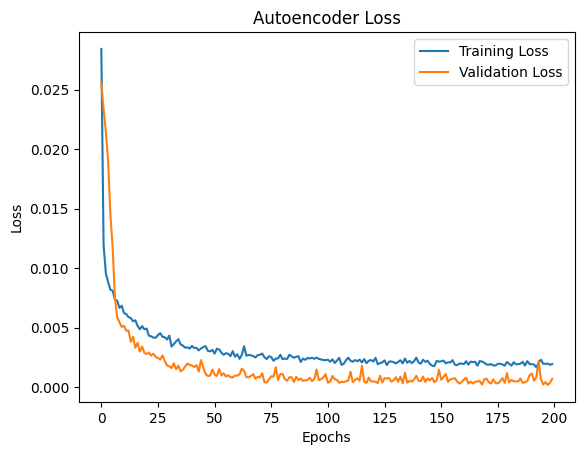

In [26]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


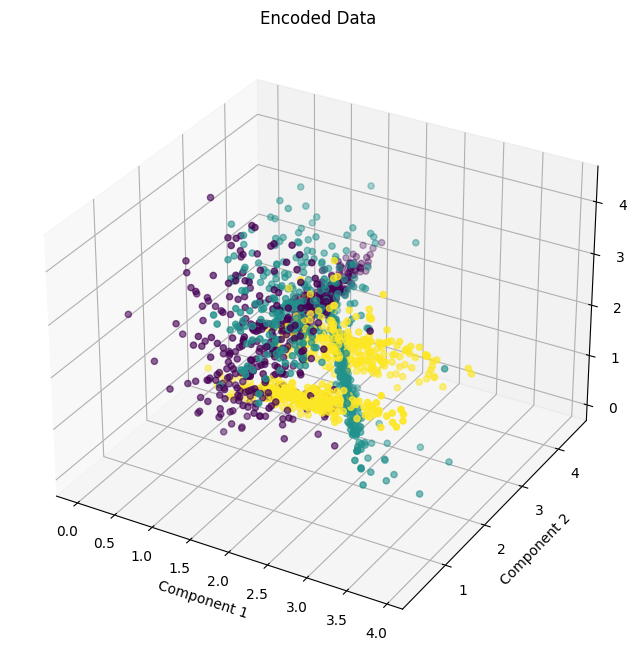

In [27]:
# Plot the t-SNE embedding
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('Encoded Data')
plt.show()

47/47 [==============================] - 0s 913us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


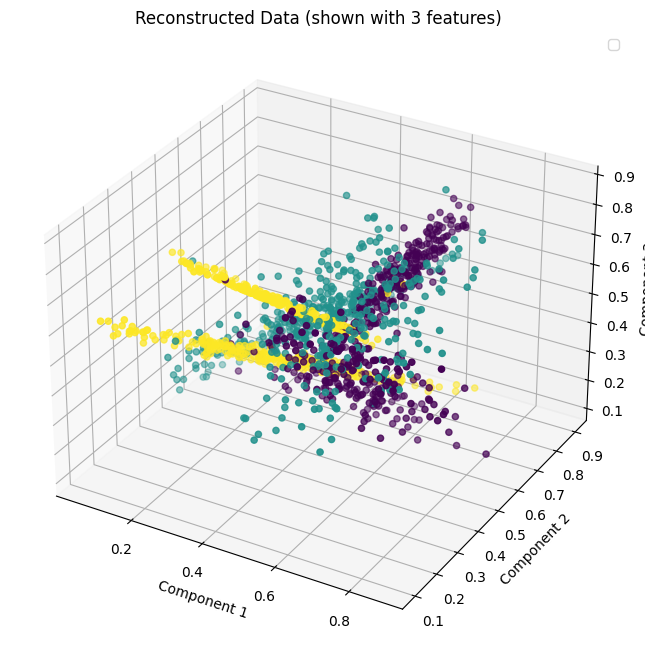

In [28]:
reconstructed_data=autoencoder.predict(X_scaled)

# Plot the encoded data in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], reconstructed_data[:, 2], c=y, cmap='viridis')
ax.set_title('Reconstructed Data (shown with 3 features)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.show()


In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(X, y)
print("Silhouette Score of main data:", silhouette)

silhouette = silhouette_score(X_tsne, y)
print("Silhouette Score of tsne output data:", silhouette)

silhouette = silhouette_score(encoded_data, y)
print("Silhouette Score of AE output data:", silhouette)
print()
# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, y)
print("Calinski-Harabasz Index of main data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(X_tsne, y)
print("Calinski-Harabasz Index of tsne output data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(encoded_data, y)
print("Calinski-Harabasz Index of AE output data:", calinski_harabasz)

print()

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, y)
print("Davies-Bouldin Index of main data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(X_tsne, y)
print("Davies-Bouldin Index of tsne output data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(encoded_data, y)
print("Davies-Bouldin Index of AE output data:", davies_bouldin)


Silhouette Score of main data: 0.06566797289129417
Silhouette Score of tsne output data: 0.06272224
Silhouette Score of AE output data: 0.055212896

Calinski-Harabasz Index of main data: 115.57774387747365
Calinski-Harabasz Index of tsne output data: 128.29009239695847
Calinski-Harabasz Index of AE output data: 100.18585685238297

Davies-Bouldin Index of main data: 3.908867073691359
Davies-Bouldin Index of tsne output data: 3.596224640991265
Davies-Bouldin Index of AE output data: 4.443499085621199


# Part B

## MLP on main data

In [12]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape

num_classes = 3

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=input_shape))
model.add(Dense(6, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
import keras
opt = keras.optimizers.Adam(learning_rate=0.005)

from keras.callbacks import Callback,ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                             factor=0.6, 
                             patience=25, 
                             min_lr=0.00008, verbose=1)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=16, epochs=500, validation_data=(x_test, y_test),callbacks=reduce_lr)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                60        
                                                                 
 dense_9 (Dense)             (None, 6)                 78        
                                                                 
 dense_10 (Dense)            (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
75/75 [==============================] - 0s 3ms/step - loss: 1.0779 - accuracy: 0.4058 - val_loss: 1.0513 - val_accuracy: 0.5400 - lr: 0.0050
Epoch 2/500
75/75 [==============================] - 0s 1ms/step - loss: 1.0394 - accuracy: 0.4875 - val_loss: 1.0247 - val_accuracy: 0.5333 - lr: 0.0050
Epoch 3/500
75

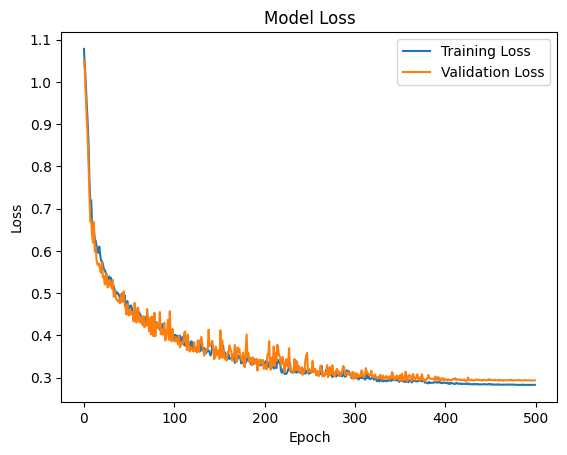

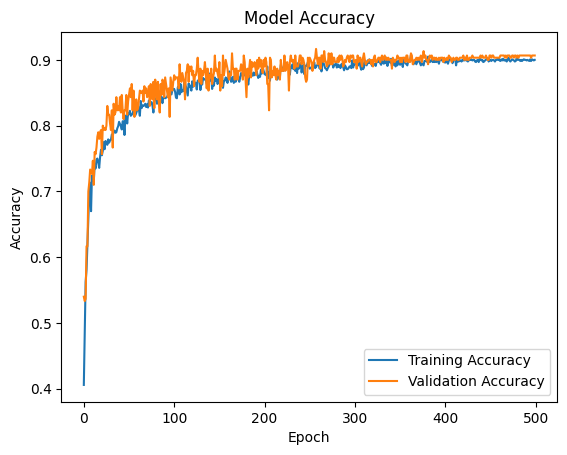

10/10 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.9067
Test loss: 0.29388439655303955
Test accuracy: 0.9066666960716248


In [13]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [14]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
from keras.utils import to_categorical

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
y_test_classes = to_categorical(y_test, num_classes=3)

auc_score = roc_auc_score(y_test_classes, y_pred)
recall = recall_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
f1 = f1_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
precision = precision_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
report = classification_report(np.argmax(y_test_classes, axis=1), y_pred_classes)

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)
print("Classification Report:")
print(report)


10/10 [==============================] - 0s 834us/step
Test AUC: 0.9733850374571102
Test Recall: 0.9066666666666666
Test F1-score: 0.9066666666666666
Test Precision: 0.9066666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        99
           1       0.92      0.89      0.90        98
           2       0.91      0.95      0.93       103

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Confusion Matrix:


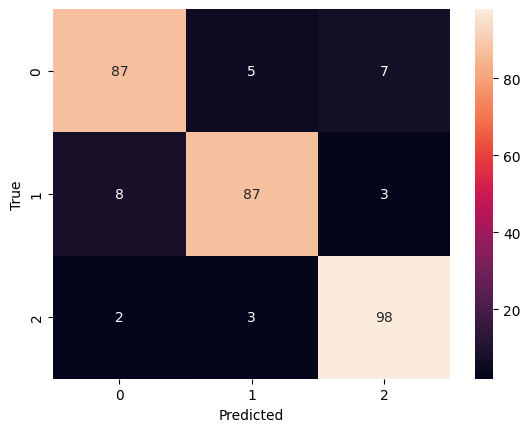

In [15]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = y_pred_classes
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## MLP on AE output data

In [24]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


x_train, x_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape

num_classes = 3

model = Sequential()
model.add(Dense(24, activation='relu', input_shape=input_shape))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)

from keras.callbacks import Callback,ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                             factor=0.7, 
                             patience=30, 
                             min_lr=0.00001, verbose=1)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=32, epochs=400, validation_data=(x_test, y_test),callbacks=reduce_lr)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 24)                96        
                                                                 
 dense_19 (Dense)            (None, 12)                300       
                                                                 
 dense_20 (Dense)            (None, 6)                 78        
                                                                 
 dense_21 (Dense)            (None, 3)                 21        
                                                                 
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
38/38 [==============================] - 0s 4ms/step - loss: 1.0893 - accuracy: 0.3733 - val_loss: 1.0483 - val_accuracy: 0.4200 - lr: 0.0010
Epoch 2/400
38/38 [===============

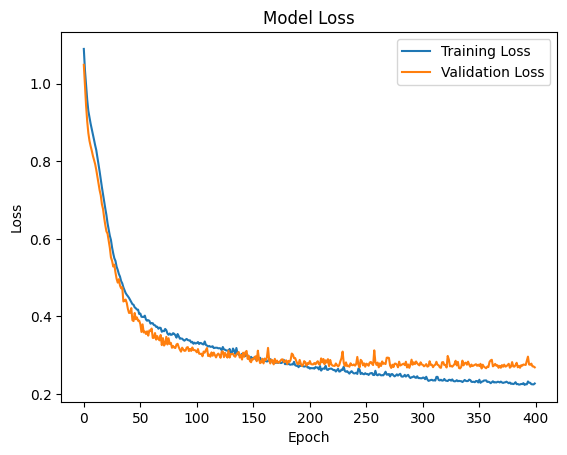

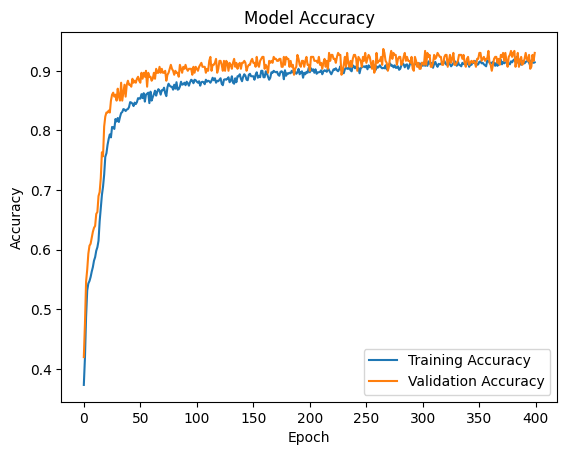

10/10 [==============================] - 0s 849us/step - loss: 0.2690 - accuracy: 0.9300
Test loss: 0.2689942419528961
Test accuracy: 0.9300000071525574


In [25]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [26]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
from keras.utils import to_categorical

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
y_test_classes = to_categorical(y_test, num_classes=3)

auc_score = roc_auc_score(y_test_classes, y_pred)
recall = recall_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
f1 = f1_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
precision = precision_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
report = classification_report(np.argmax(y_test_classes, axis=1), y_pred_classes)

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)
print("Classification Report:")
print(report)


10/10 [==============================] - 0s 1ms/step
Test AUC: 0.9740335346980297
Test Recall: 0.93
Test F1-score: 0.93
Test Precision: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        99
           1       0.93      0.89      0.91        98
           2       0.94      1.00      0.97       103

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Confusion Matrix:


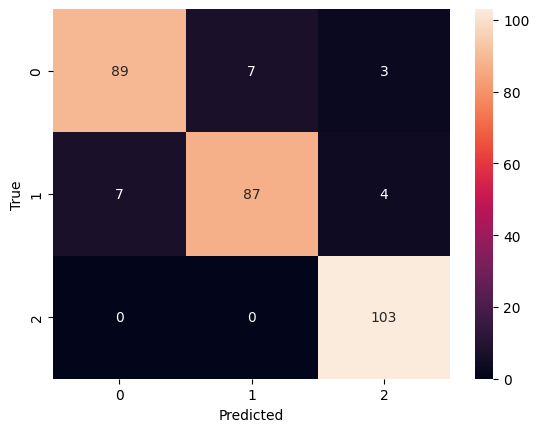

In [27]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = y_pred_classes
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## MLP on TSNE output data

In [32]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


x_train, x_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape

num_classes = 3

model = Sequential()
model.add(Dense(16, activation='elu', input_shape=input_shape))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
import keras
opt = keras.optimizers.Adam(learning_rate=0.0008)

from keras.callbacks import Callback,ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                             factor=0.8, 
                             patience=30, 
                             min_lr=0.00001, verbose=1)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=16, epochs=400, validation_data=(x_test, y_test),callbacks=reduce_lr)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                64        
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 3)                 51        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
75/75 [==============================] - 0s 2ms/step - loss: 1.2261 - accuracy: 0.4083 - val_loss: 0.8995 - val_accuracy: 0.5000 - lr: 8.0000e-04
Epoch 2/400
75/75 [==============================] - 0s 1ms/step - loss: 0.8347 - accuracy: 0.6517 - val_loss: 0.7003 - val_accuracy: 0.7733 - lr: 8.0000e-04
Epoc

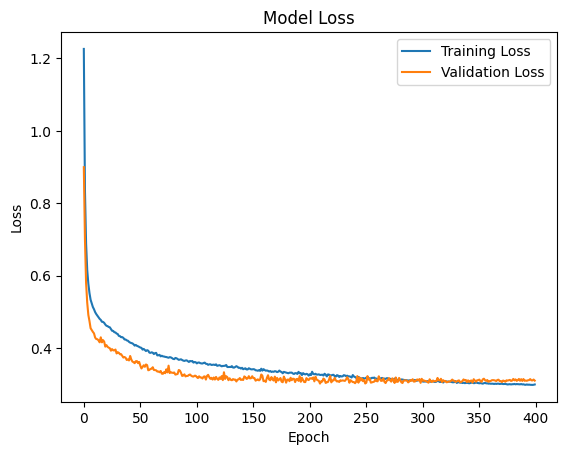

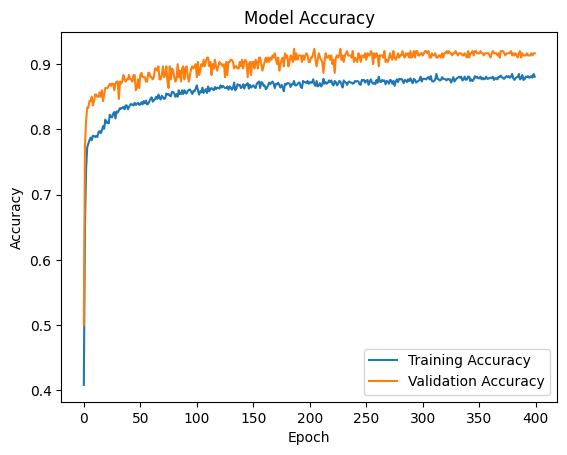

10/10 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.9167
Test loss: 0.3101518154144287
Test accuracy: 0.9166666865348816


In [33]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [34]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
from keras.utils import to_categorical

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
y_test_classes = to_categorical(y_test, num_classes=3)

auc_score = roc_auc_score(y_test_classes, y_pred)
recall = recall_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
f1 = f1_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
precision = precision_score(np.argmax(y_test_classes, axis=1), y_pred_classes, average='micro')
report = classification_report(np.argmax(y_test_classes, axis=1), y_pred_classes)

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)
print("Classification Report:")
print(report)


10/10 [==============================] - 0s 2ms/step
Test AUC: 0.9701992760363919
Test Recall: 0.9166666666666666
Test F1-score: 0.9166666666666666
Test Precision: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        99
           1       0.90      0.89      0.89        98
           2       0.92      0.95      0.93       103

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Confusion Matrix:


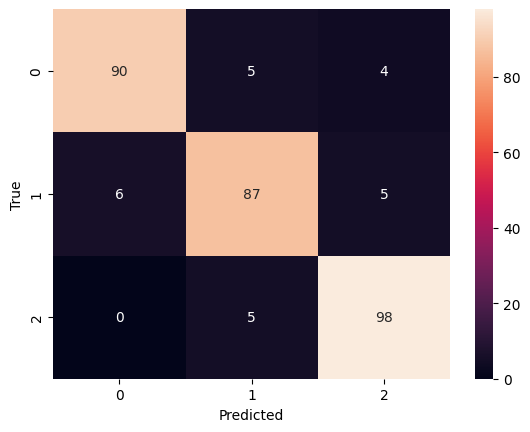

In [35]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = y_pred_classes
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()